In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

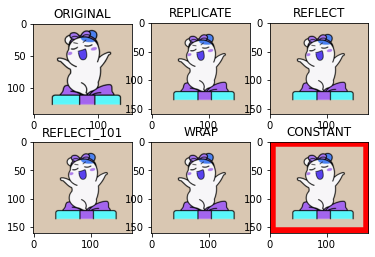

In [3]:
BLUE = [255,0,0]

img1 = cv2.imread('ebc.png')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

# 1.3.2 Arithmetic Operations on Images

In [4]:
x = np.uint8([250])
y = np.uint8([10])

In [5]:
print(cv2.add(x,y))

[[255]]


In [6]:
print(x+y)

[4]


In [12]:
img1 = cv2.imread('ebc.jpg')
img2 = cv2.imread('photo.jpg')

img1 = cv2.resize(img1,(500,332))
img2 = cv2.resize(img2,(500,332))
print(img1.shape), print(img2.shape)

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

(332, 500, 3)
(332, 500, 3)


## Bitwise Operations

In [15]:
img1 = cv2.imread('photo.jpg')
img2 = cv2.imread('ebc.png')

rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()